In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [3]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)



In [22]:
y_score[0]

array([-0.76305896, -0.36472635,  0.1239796 ])

In [20]:
0.1239796 - 0.36472635 -0.76305896

-1.00380571

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

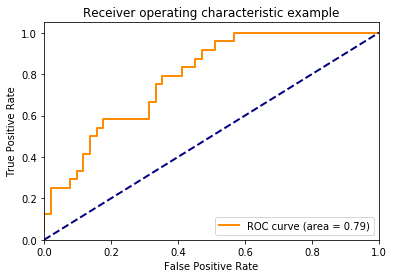

In [4]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

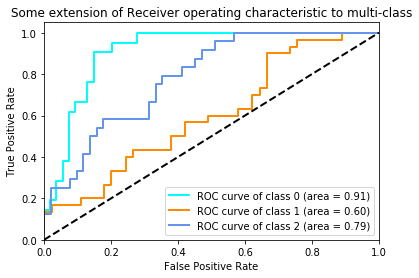

In [6]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# # Then interpolate all ROC curves at this points
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# # Finally average it and compute AUC
# mean_tpr /= n_classes

# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Practice

In [ ]:
import numpy as np
cm = np.array([[195  , 5 , 0  , 0],
 [  5, 180  ,11 ,  4],
 [  0  ,19 , 65  ,16],
 [  1  , 2 , 12 , 86]]).T

# x: true
# y: pred

# 본 클래스 말고 true 레이블 중 맞춘것 - ok
norm_spec = (cm[1,1] + cm[2,2] + cm[3,3])/np.sum(cm[:,[1,2,3]])
lgd_spec = (cm[0,0] + cm[2,2] + cm[3,3])/np.sum(cm[:,[0,2,3]])
hgd_spec = (cm[0,0] + cm[1,1] + cm[3,3])/np.sum(cm[:,[0,1,3]])
can_spec = (cm[0,0] + cm[1,1] + cm[2,2])/np.sum(cm[:,[0,1,2]])
# ok
norm_sensit = cm[0,0]/np.sum(cm[:,0])
lgd_sensit = cm[1,1]/np.sum(cm[:,1])
hgd_sensit = cm[2,2]/np.sum(cm[:,2])
can_sensit = cm[3,3]/np.sum(cm[:,3])
# ok
norm_PPV = cm[0,0]/np.sum(cm[0,:])
lgd_PPV = cm[1,1]/np.sum(cm[1,:])
hgd_PPV = cm[2,2]/np.sum(cm[2,:])
can_PPV = cm[3,3]/np.sum(cm[3,:])
# 본 클래스 말고 predic 중 맞춘것 - ok
norm_NPV = (cm[1,1] + cm[2,2] + cm[3,3])/np.sum(cm[[1,2,3],:])
lgd_NPV = (cm[0,0] + cm[2,2] + cm[3,3])/np.sum(cm[[0,2,3],:])
hgd_NPV = (cm[0,0] + cm[1,1] + cm[3,3])/np.sum(cm[[0,1,3],:])
can_NPV = (cm[0,0] + cm[1,1] + cm[2,2])/np.sum(cm[[0,1,2],:])

import pandas as pd
result_analy = {'norm_spec':[norm_spec],'lgd_spec':[lgd_spec], 'hgd_spec':[hgd_spec],'can_spec':[can_spec],
          'norm_sensit':[norm_sensit],'lgd_sensit':[lgd_sensit], 'hgd_sensit':[hgd_sensit],'can_sensit':[can_sensit],
          'norm_PPV':[norm_PPV],'lgd_PPV':[lgd_PPV], 'hgd_PPV':[hgd_PPV],'can_PPV':[can_PPV],
           'norm_NPV':[norm_NPV],'lgd_NPV':[lgd_NPV], 'hgd_NPV':[hgd_NPV],'can_NPV':[can_NPV]
          }
df_result_analy = pd.DataFrame.from_dict(result_analy)
df_result_analy